# Обучение нейросети распознавать имена фамилии отчества

In [1]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [2]:
def get_new_forms_from_file(name_file):
    new_forms = []
    with open(name_file,'r') as ish_f:
        for word_ish in ish_f:
            word_ish = word_ish.strip().lower()
            word = morph.parse(word_ish)[0].lexeme
            for k in word:
                new_forms.append(k.word)
    name_set = set(new_forms)
    print(len(name_set))
    return name_set

получаем все словоформы имен

In [3]:

name_set = get_new_forms_from_file('/home/al/PycharmProjects/NLP-russian-language/datasets/datasets_with_name_peaple/name_com.txt')

531944


получаем все словоформы фамилий

In [4]:
fameli_set = get_new_forms_from_file('/home/al/PycharmProjects/NLP-russian-language/datasets/datasets_with_name_peaple/fameli_com.txt')

4102327


исключаем словоформы фамилий из словоформ имен

In [5]:
name_set = name_set.difference(fameli_set)
print(len(name_set))

475280


Все словоформы отчеств

In [6]:
name_dad_set = get_new_forms_from_file('/home/al/PycharmProjects/NLP-russian-language/datasets/datasets_with_name_peaple/name_dad_com.txt')

26751


простые слова из словаря убраны все словоформы фамилий имен и отчеств

In [7]:
words_other = []
with open('/home/al/PycharmProjects/NLP-russian-language/datasets/datasets_with_name_peaple/words_withot_fameli_name_name_dad.txt','r') as ish_f:
    for ww_one in ish_f:
        words_other.append(ww_one.strip())

In [8]:
name_list_ish = list(name_set) + list(name_set) + list(name_set) + list(name_set) #+ list(name_set) + list(name_set) + list(name_set) + list(name_set)
print(len(name_list_ish))

1901120


In [9]:
name_dad_ish = list(name_dad_set) + list(name_dad_set) + list(name_dad_set) + list(name_dad_set) + list(name_dad_set)
name_dad_ish = name_dad_ish + name_dad_ish + name_dad_ish + name_dad_ish + name_dad_ish
#name_dad_ish = name_dad_ish + name_dad_ish + name_dad_ish + name_dad_ish + name_dad_ish + name_dad_ish
print(len(name_dad_ish))

668775


In [10]:
def get_array_obj(fameli):
    array_ish = []
    for ww in fameli:
       array_ish.append(list(ww))
    print(len(array_ish))
    return array_ish

## делаем из каждого слова список символов

In [11]:
fameli_count = get_array_obj(fameli_set)
words_count = get_array_obj(words_other)
name_count = get_array_obj(name_list_ish)
name_dad_count = get_array_obj(name_dad_ish)

4102327
2556595
1901120
668775


In [12]:
from nltk.util import ngrams

## из разложения слова по символам создаем инграммы по 4 символа из инграмм делаем предложения 

In [13]:
def from_word_list_to_sentenses(dd:list):
    servis_list =[]
    servis_list.append(''.join(dd))
    ngg = list(ngrams(dd, 4))
    for nn in ngg:
        word = ''.join(nn)
        servis_list.append(word)
    return ' '.join(servis_list)

### создаем список предложений по каждому слову

In [14]:
def get_sentenses(array_ish, y, label, sentenses):
    k = 0
    for dd in array_ish:
        sentenses.append(from_word_list_to_sentenses(dd))
        y.append(label)
#         k +=1
#         if k == 10: break
    #print(sentenses)
    return sentenses, y

### создаем единый массив из слов и классов

In [15]:
y =[]
sentenses = []
sentenses, y = get_sentenses(fameli_count, y, 'фамилия', sentenses)
print(1)
sentenses, y = get_sentenses(words_count, y, 'слово', sentenses)
print(2)
sentenses, y = get_sentenses(name_count, y, 'имя', sentenses)
print(3)
sentenses, y = get_sentenses(name_dad_count, y, 'отчество', sentenses)
print(4)

1
2
3
4


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### разделляем данные на обучающие и оценочные

In [17]:
X_train, X_test, y_train, y_test = train_test_split(sentenses, y, test_size=0.33, random_state=42)

In [18]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
print(X_train_counts.shape)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# Метод наивный Байес
clf = MultinomialNB().fit(X_train_tfidf, y_train)

(6183307, 4917196)


In [35]:
X_test_new = vectorizer.transform(X_test)
print(X_test_new.shape)
X_new_tfidf = tfidf_transformer.transform(X_test_new)
predicted = clf.predict(X_new_tfidf)
k = 0
for doc, category in zip(y_test, predicted):
    #print('%r => %s' % (doc, category))
    if doc == category: k +=1
print(k/len(y_test))

(3045510, 4917196)
0.8741455454094716


In [36]:
import pickle
# сохраняем модель
with open('model_FIO.pkl', 'wb') as f:
    pickle.dump(clf, f )

In [38]:
from sklearn.metrics import accuracy_score
class_num = {'фамилия':1, 'имя':2, 'отчество':3, 'слово':4}
y_ac = []
x_ac = []
for kk in y_test: y_ac.append(class_num[kk])
for kk in predicted: x_ac.append(class_num[kk])
print(accuracy_score(y_ac,x_ac))

<class 'numpy.ndarray'>
0.8741455454094716


Text(0.5, 1.0, 'Confusion matrix')

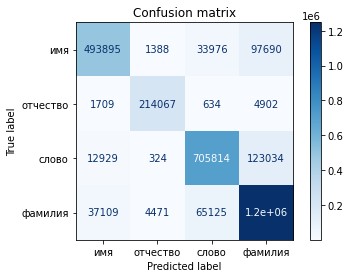

In [44]:
# Построение ненормализованной матрицы неточностей
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
title = "Confusion matrix"
normalize = None

disp = plot_confusion_matrix(clf, X_new_tfidf, y_test,
                             cmap=plt.cm.Blues,
                             normalize=normalize)
disp.ax_.set_title(title)

In [23]:
train_array = []
train_y = [] 
train_array, train_y = get_sentenses([list('Гансиор'.lower())], train_y, 'фамилия', train_array)
train_array, train_y = get_sentenses([list('Корнеев'.lower())], train_y, 'фамилия', train_array)
train_array, train_y = get_sentenses([list('Сергею'.lower())], train_y, 'имя', train_array)
train_array, train_y = get_sentenses([list('Александровичу'.lower())], train_y, 'отчество', train_array)
train_array, train_y = get_sentenses([list('виамин'.lower())], train_y, 'имя', train_array)

In [24]:
X_train_new = vectorizer.transform(train_array)
X_new_tfidf = tfidf_transformer.transform(X_train_new)
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(train_y, predicted):
    print('%r => %s' % (doc, category))
    if doc == category: print('True')

'фамилия' => слово
'фамилия' => фамилия
True
'имя' => имя
True
'отчество' => отчество
True
'имя' => имя
True
